In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.ticker as ptick
import scipy.special as sp

In [98]:
df = pd.read_csv("./WaveData/scope_60.csv", names = ["time", "signal", "sync"], skiprows = 2, skipfooter=1, engine="python")

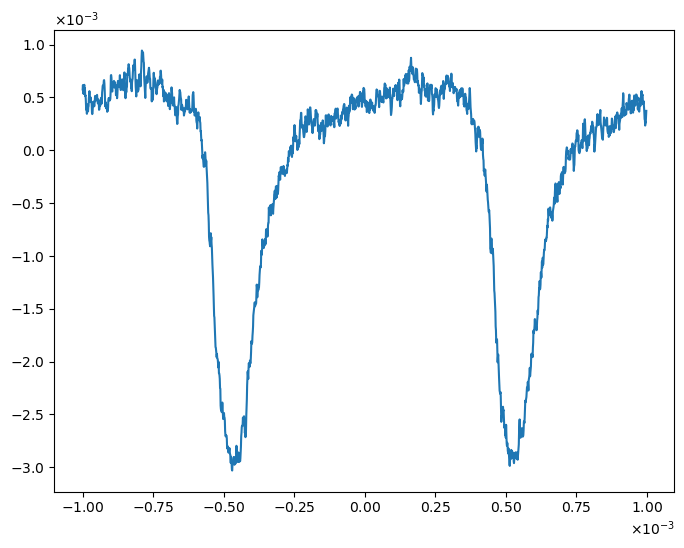

In [78]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(df.time, df.signal)
#plt.grid(which="both")
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci", axis="x", scilimits=(-3,-3))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci", axis="y", scilimits=(-3,-3))

In [90]:
def Gaus(x, p0, a, m, s):
    return p0 - a*np.exp(-0.5*(x-m)**2/s**2)

In [91]:
def CrystalBall(x, x0, sigma_left, alpha_left, n_left, 
                sigma_right, alpha_right,n_right, const, Cap_N):
  Al = (n_left/np.abs(alpha_left))**n_left*np.exp(-alpha_left**2/2)
  Ar = (n_right/np.abs(alpha_right))**n_right*np.exp(-alpha_right**2/2)
  Bl = n_left/np.abs(alpha_left)-np.abs(alpha_left)
  Br = n_right/np.abs(alpha_right)-np.abs(alpha_right)
  Cl = (n_left/np.abs(alpha_left))*(1/(n_left-1))*np.exp(-alpha_left**2/2)
  Cr = (n_right/np.abs(alpha_right))*(1/(n_right-1))*np.exp(-alpha_right**2/2)
  Dl = np.sqrt(np.pi/2)*(1+sp.erf(np.abs(alpha_left)/np.sqrt(2)))
  Dr = np.sqrt(np.pi/2)*(1+sp.erf(np.abs(alpha_right)/np.sqrt(2)))
  Nl = 1/(sigma_left*(Cl+Dl))
  Nr = 1/(sigma_right*(Cr+Dr))

  """
  if (x-x0)/sigma_left <= -alpha_left:
    y = const-Nl*Al*(Bl-(x-x0)/sigma_left)**(-n_left)
  elif -alpha_left< (x-x0)/sigma_left <= 0 :
    y = const-Nl*np.exp(-0.5*(x-x0)**2/sigma_left**2)
  elif 0 < (x-x0)/sigma_right <= alpha_right:
    y = const-Nr*np.exp(-0.5*(x-x0)**2/sigma_right**2)
  else:
    y = const-Nr*Ar*(Br+(x-x0)/sigma_right)**(-n_right)
  return y
  """

  if (x-x0)/sigma_left <= -alpha_left:
    y = const-Cap_N*Al*(Bl-(x-x0)/sigma_left)**(-n_left)
  elif -alpha_left< (x-x0)/sigma_left <= 0 :
    y = const-Cap_N*np.exp(-0.5*(x-x0)**2/sigma_left**2)
  elif 0 < (x-x0)/sigma_right <= alpha_right:
     y = const-Cap_N*np.exp(-0.5*(x-x0)**2/sigma_right**2)
  else:
     y = const-Cap_N*Ar*(Br+(x-x0)/sigma_right)**(-n_right)
  return y

crystal_ball = np.vectorize(CrystalBall)

In [92]:
#fit_range = 0.02*10**(-3)
Npeak = 2
F_mod = 1000
F_dev = 700
Fit_Range = 0.0001
i = 1
#par, cov = curve_fit(Gaus, df.time, df.signal, p0 = (100.0e-03, 100.0e-03, 1.23973294e-04, 1.0e-05)) #scope_122.csv
#par, cov = curve_fit(Gaus, df.time, df.signal, p0 = (2.78178136e-03, 3.79468291e-03, 1.3e-04, 1.03333551e-05))
#par, cov = curve_fit(crystal_ball, df.time, df.signal, p0 = (1.26e-04, 0.908448772e-05, 0.82899972e+00, 1.17570679e+02, 1.208097853e-05, 3.70396123e-01, 1.01912331e+02, 2.96644947e-03, 3.9e-03)) #scope_125.csv

par, cov = curve_fit(Gaus, df.time, df.signal, p0 = (0, 0.003, 0.0005471147644754069-Npeak/2/F_mod+i/F_mod, 6*10**(-5)))

#x = np.linspace(0.115*10**(-3), 0.14*10**(-3), 1000)
#x = np.linspace(1.3*10**(-4)-fit_range, 1.3*10**(-4)+fit_range, 1000)
x = np.linspace(0.0005471147644754069-Npeak/2/F_mod+i/F_mod-Fit_Range, 0.0005471147644754069-Npeak/2/F_mod+i/F_mod+Fit_Range, 1000)
y = Gaus(x, par[0], par[1], par[2], par[3])

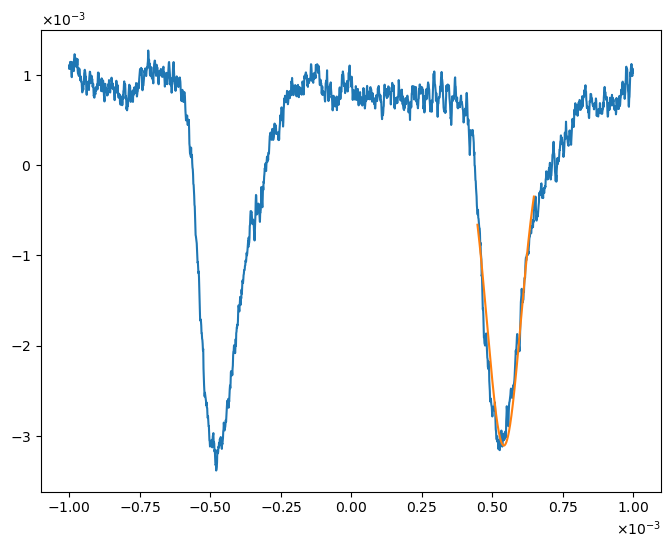

In [93]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(df.time, df.signal)
plt.plot(x, y)
#plt.grid(which="both")
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci", axis="x", scilimits=(-3,-3))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci", axis="y", scilimits=(-3,-3))
#plt.savefig("./peak/120-129/crystal_ball/2.png")

In [83]:
x0 = par[2]
sigma = par[3]

In [101]:
Fit_Range = 0.0001
#par, cov = curve_fit(crystal_ball, df.time, df.signal, p0 = (1.23940729e-04, 1.08390763e-05, 1.12849285e+00, 9.04483335e+01, 2.08097853e-05, 6.07396123e-01, 1.31912331e+02, 2.96644947e-03, 3.20672825e-03))
#par, cov = curve_fit(crystal_ball, df.time, df.signal, p0 = (1.23973294e-04, 1.08448772e-05, 1.12899972e+00, 1.17570679e+02, 1.508097853e-05, 4.50396123e-01, 1.01912331e+02, 2.96644947e-03, 3.9e-03)) #scope_122.csv
#par, cov = curve_fit(crystal_ball, df.time, df.signal, p0 = (1.26e-04, 0.908448772e-05, 0.82899972e+00, 1.17570679e+02, 1.208097853e-05, 3.70396123e-01, 1.01912331e+02, 2.96644947e-03, 3.9e-03)) #scope_125.csv
par, cov = curve_fit(crystal_ball, df.time, df.signal, p0 = (x0, sigma, 1.12849285e+00, 9.04483335e+01, sigma, 6.07396123e-01, 1.31912331e+02, 2.96644947e-03, 3.20672825e-03))

#x = np.linspace(0.1*10**(-3), 0.175*10**(-3), 1000)
x = np.linspace(0.0005471147644754069-Npeak/2/F_mod+i/F_mod-Fit_Range, 0.0005471147644754069-Npeak/2/F_mod+i/F_mod+Fit_Range, 1000)
y = crystal_ball(x, par[0], par[1], par[2], par[3], par[4], par[5], par[6], par[7], par[8])

/tmp/ipykernel_343/748180570.py:3: RuntimeWarning: overflow encountered in double_scalars
  Al = (n_left/np.abs(alpha_left))**n_left*np.exp(-alpha_left**2/2)
/tmp/ipykernel_343/748180570.py:4: RuntimeWarning: overflow encountered in double_scalars
  Ar = (n_right/np.abs(alpha_right))**n_right*np.exp(-alpha_right**2/2)
/tmp/ipykernel_343/748180570.py:27: RuntimeWarning: invalid value encountered in double_scalars
  y = const-Cap_N*Al*(Bl-(x-x0)/sigma_left)**(-n_left)
/tmp/ipykernel_343/748180570.py:33: RuntimeWarning: invalid value encountered in double_scalars
  y = const-Cap_N*Ar*(Br+(x-x0)/sigma_right)**(-n_right)
/tmp/ipykernel_343/748180570.py:3: RuntimeWarning: invalid value encountered in double_scalars
  Al = (n_left/np.abs(alpha_left))**n_left*np.exp(-alpha_left**2/2)
/tmp/ipykernel_343/748180570.py:4: RuntimeWarning: invalid value encountered in double_scalars
  Ar = (n_right/np.abs(alpha_right))**n_right*np.exp(-alpha_right**2/2)


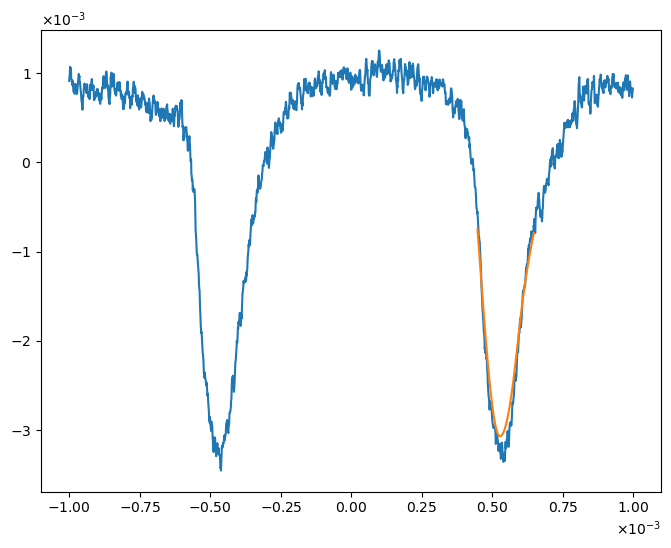

In [102]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(df.time, df.signal)
plt.plot(x, y)
#plt.grid(which="both")
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci", axis="x", scilimits=(-3,-3))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci", axis="y", scilimits=(-3,-3))
#plt.savefig("./peak/120-129/crystal_ball/2.png")

In [86]:
par

array([5.25867872e-04, 8.24336074e-05, 1.29850466e+00, 3.00232332e-10,
       1.00092914e-04, 6.65256624e-01, 4.94380899e-01, 2.14635147e-03,
       4.90631857e-03])

In [87]:
par, cov = curve_fit(crystal_ball, df.time, df.signal, p0 = (par[0], par[1], par[2], par[3], par[4], par[5], par[6], par[7], par[8]))

#x = np.linspace(0.1*10**(-3), 0.175*10**(-3), 1000)
x = np.linspace(0.0005471147644754069-Npeak/2/F_mod+i/F_mod-Fit_Range, 0.0005471147644754069-Npeak/2/F_mod+i/F_mod+Fit_Range, 1000)
y = crystal_ball(x, par[0], par[1], par[2], par[3], par[4], par[5], par[6], par[7], par[8])

/tmp/ipykernel_343/748180570.py:3: RuntimeWarning: invalid value encountered in double_scalars
  Al = (n_left/np.abs(alpha_left))**n_left*np.exp(-alpha_left**2/2)


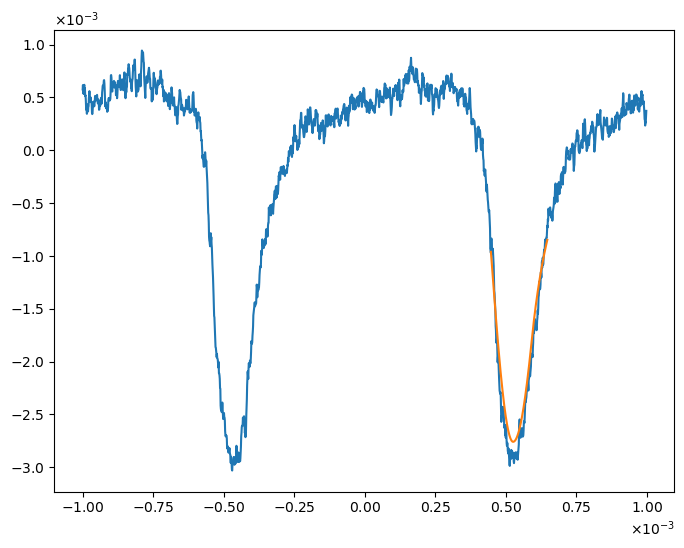

In [88]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(df.time, df.signal)
plt.plot(x, y)
#plt.grid(which="both")
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci", axis="x", scilimits=(-3,-3))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci", axis="y", scilimits=(-3,-3))
#plt.savefig("./peak/120-129/crystal_ball/2.png")